In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df_polytruth = pd.read_csv('poly_truth.tsv',sep='\t')
#df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
df_polytruth
#df_quantboot
print df_polytruth[df_polytruth['transcript_id']=='ENST00000382369']

     transcript_id  count
1  ENST00000382369     55


In [9]:
df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
df_quantboot

,ENST00000382410,ENST00000382398,ENST00000382388,ENST00000334391,ENST00000246105,ENST00000382376,ENST00000608495,ENST00000382369,ENST00000360321,ENST00000400269,...,ENST00000361739,ENST00000361851,ENST00000361899,ENST00000362079,ENST00000361227,ENST00000361335,ENST00000361381,ENST00000361567,ENST00000361681,ENST00000361789
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.883856,39.171097,76.945048,...,340542.0,8243.0,226696.0,350676.0,30789.0,22622.0,416274.0,209543.0,72493.0,155487.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.452552,34.417119,57.130328,...,340588.0,8182.0,225616.0,350708.0,30924.0,22561.0,416189.0,210278.0,72457.0,155421.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.022268,40.270625,66.707107,...,340376.0,8141.0,225298.0,349968.0,30679.0,22785.0,417887.0,209341.0,72090.0,155413.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.448546,54.205469,74.345986,...,340396.0,8331.0,225399.0,350515.0,30572.0,22530.0,416645.0,209451.0,72606.0,154654.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.613650,38.867228,58.519122,...,340214.0,8172.0,226259.0,349596.0,30778.0,22333.0,416949.0,210803.0,72920.0,155706.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.343185,41.901452,71.755363,...,339903.0,7937.0,226125.0,351004.0,30791.0,22718.0,416943.0,209884.0,72580.0,155084.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.268641,44.774505,82.956854,...,340384.0,8239.0,225436.0,351473.0,30712.0,22403.0,416107.0,210646.0,72673.0,155238.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.179771,49.831821,71.988408,...,341175.0,8000.0,225854.0,350240.0,30612.0,22792.0,415684.0,209598.0,72895.0,155384.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.491140,35.811527,77.697334,...,339514.0,8122.0,225129.0,350510.0,31242.0,22557.0,416848.0,209920.0,72678.0,155236.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.111334,39.115467,100.773199,...,339823.0,8316.0,225267.0,352113.0,30575.0,22450.0,415928.0,210032.0,72712.0,155685.0


In [60]:
import numpy as np



#df_quantboot['ENST00000382369']

df_polytruth['mean']=0
df_polytruth['std']=0


df_polytruth

df_new = df_polytruth.head(10)
#df_new['transcript_id']

#for i in df_new.columns:
#    print i
#mean = df_quantboot[row].mean()
    #print df_new[df_new['transcript_id']==i]
    #print mean
    #df_polytruth['std']= np.std(df_quantboot[i])
    
    
df_new['mean']=0
df_new['std']=0
df_new['deviation']=0
for index,row in df_new.iterrows():
    #print row
    mean = df_quantboot[row['transcript_id']].mean()
   
    df_new.loc[df_new.transcript_id==row['transcript_id'],'mean']=mean
    
    std= np.std(df_quantboot[row['transcript_id']])
    df_new.loc[df_new.transcript_id==row['transcript_id'],'std']=std
    #print df_new['std']
    row['std']=std
    row['mean'] = mean
    if row['std']!=0:
        #print abs(row['count']-row['mean'])/row['std']
        df_new.loc[df_new.transcript_id==row['transcript_id'],'deviation']= abs(row['count']-row['mean'])/row['std']
    
#df_new.apply(test, axis=1)
#df_new
#df_new.sort_values()
df_new=df_new.sort_values('deviation', ascending=False)

df_faulty = df_new[df_new['deviation']>2]
    
df_good = df_new[df_new['deviation']<=2]

df_faulty

,transcript_id,count,mean,std,deviation
5,ENST00000342665,2804,1996.815000,43.054509,18.747978
4,ENST00000382352,2653,2035.750000,45.131558,13.676683
6,ENST00000609179,261,183.390000,12.932436,6.001190
8,ENST00000449710,350,233.963500,20.134207,5.763152
7,ENST00000217233,382,268.623238,20.302828,5.584284
9,ENST00000422053,259,198.303262,20.036520,3.029305


In [61]:
df_quantsf = pd.read_csv("quant.sf",sep='\t')
df_faulty_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads'])
df_good_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads'])
for index,row in df_faulty.iterrows():
    df_faulty_prop = df_faulty_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    #df_temp.loc[index]=df_quantsf[df_quantsf['Name']==row['transcript_id']]
for index,row in df_good.iterrows():
    df_good_prop = df_good_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
#df_quantsf[df_quantsf['Name']=='ENST00000342665']
df_good_prop


,Name,Length,EffectiveLength,TPM,NumReads
9,ENST00000400269,1022,822.991,2.705958,72.364073
8,ENST00000360321,1575,1375.991,0.912080,40.780781
7,ENST00000382369,1420,1220.991,1.180968,46.855146
6,ENST00000608495,1672,1472.991,0.000000,0.000000


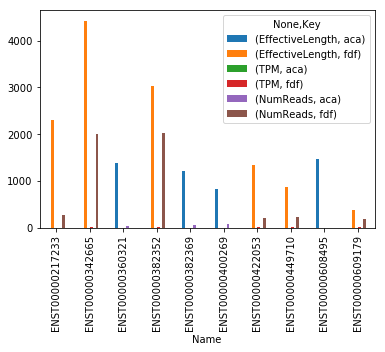

In [77]:
import matplotlib.pyplot as plt

#ax2 = df_faulty_prop.plot(x='Name', y='Length',kind='bar')

#df_good_prop.plot(x='Name', y='Length',kind='bar',ax=ax2)

#df_faulty_prop.plot(x='Name', y='Length',kind='bar')
#plt.show()

#df_good_prop.plot(x='Name', y='Length',kind='bar')
df_good_prop['Key']='aca'
df_faulty_prop['Key']='fdf'
DF = pd.concat([df_good_prop,df_faulty_prop],keys=['aca','fdf'])

DFGroup = DF.groupby(['Name','Key'])

DFG = DFGroup.sum().unstack('Key').plot(kind='bar')

plt.show()